# Imbalanced Data

In [1]:
# https://www.openml.org/d/1220
# https://www.openml.org/d/1241
# https://www.openml.org/d/37
# https://www.openml.org/d/44

from sklearn.datasets import fetch_openml

data = fetch_openml(data_id=1220)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

In [3]:
df = pd.DataFrame(
    data['data'],
    columns=data['feature_names']
).astype(float)

df['target'] = pd.Series(data['target']).astype(int) 

In [4]:
df.sample(n=5)

,impression,ad_id,advertiser_id,depth,position,keyword_id,title_id,description_id,user_id,target
7245,1.0,21193219.0,35900.0,3.0,1.0,5.0,148.0,195.0,5003639.0,0
16040,1.0,21818926.0,37716.0,1.0,1.0,5846.0,33576.0,26849.0,1338874.0,0
35455,1.0,20192676.0,27961.0,1.0,1.0,39.0,131.0,440.0,2405920.0,0
16429,1.0,20001249.0,1381.0,2.0,2.0,361.0,5581.0,5890.0,0.0,0
35609,1.0,4241447.0,18226.0,2.0,2.0,8248.0,245292.0,213698.0,11225727.0,0


In [5]:
df.target.value_counts(normalize=True)

0    0.831581
1    0.168419
Name: target, dtype: float64

In [6]:
df.shape

(39948, 10)

In [11]:
for feature in df.columns[:-1].tolist():
  print(f'Cardinality of {feature}: {df[feature].value_counts().shape[0]:,}')

Cardinality of impression: 99
Cardinality of ad_id: 19,228
Cardinality of advertiser_id: 6,064
Cardinality of depth: 3
Cardinality of position: 3
Cardinality of keyword_id: 19,803
Cardinality of title_id: 25,321
Cardinality of description_id: 22,381
Cardinality of user_id: 30,114


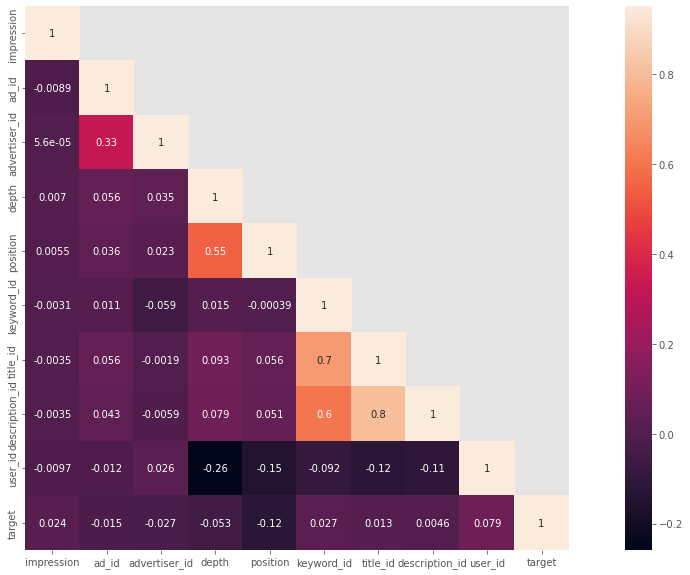

In [12]:
import seaborn as sns

cor_matt = df.corr()
mask = np.array(cor_matt)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(20,10)
sns.heatmap(cor_matt, mask=mask,vmax=.95, square=True,annot=True)

In [13]:
feature_names = data['feature_names']

x = df[feature_names]
y = df['target']

In [14]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    x, y, 
    test_size=0.25, 
    random_state=42,
)

In [15]:
print(y_train.value_counts(normalize=True))
print(y_test.value_counts(normalize=True))

0    0.831581
1    0.168419
Name: target, dtype: float64
0    0.831581
1    0.168419
Name: target, dtype: float64


In [16]:
from sklearn.preprocessing import MaxAbsScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomTreesEmbedding
from sklearn.pipeline import Pipeline
from sklearn.metrics import precision_score, recall_score
from imblearn.metrics import geometric_mean_score


def predict_and_evalutate(x_train, y_train, x_test, y_test, sample_weight=None, title='Unweighted'):
    
    
    clf = Pipeline(
        [
            ('Embedder', RandomTreesEmbedding(n_estimators=10, max_leaf_nodes=20, random_state=42)), 
            ('Sclaer', MaxAbsScaler()),
            ('Classifier', LogisticRegression(solver='saga', max_iter=1000, random_state=42))
        ]
    )
    clf.fit(x_train, y_train, Classifier__sample_weight=sample_weight)
    y_test_pred = clf.predict(x_test)
    
    print(
        'Precision: {:.02%}, Recall: {:.02%}; G-mean: {:.02%} @  {}'.format(
            precision_score(y_test, y_test_pred),
            recall_score(y_test, y_test_pred),
            geometric_mean_score(y_test, y_test_pred),
            title
        )
    )
    
    return clf

In [17]:
clf = predict_and_evalutate(x_train, y_train, x_test, y_test)

Precision: 62.50%, Recall: 0.30%; G-mean: 5.45% @  Unweighted
